**Importing libraries**


---



In [ ]:

import pandas as pd
import numpy as np
import matplotlib
import seaborn as sb
import matplotlib.pyplot as plt
from scipy.stats import f_oneway
import matplotlib.mlab as mlab
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None

**Reading the Dataset**

---





In [ ]:
ds = pd.read_csv("/content/movies.csv")

In [ ]:
ds

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,NaN,Drama,2020,"October 23, 2020 (United States)",3.1,18.0,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000.0,NaN,NaN,90.0
7664,Dream Round,NaN,Comedy,2020,"February 7, 2020 (United States)",4.7,36.0,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,NaN,NaN,Cactus Blue Entertainment,90.0
7665,Saving Mbango,NaN,Drama,2020,"April 27, 2020 (Cameroon)",5.7,29.0,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750.0,NaN,Embi Productions,NaN
7666,It's Just Us,NaN,Drama,2020,"October 1, 2020 (United States)",NaN,NaN,James Randall,James Randall,Christina Roz,United States,15000.0,NaN,NaN,120.0


In [ ]:
ds.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


**Data Cleaning**


---



In [ ]:
#deleting the rows containing no values or NAN
for col in ds.columns:
   if values_missing.any():
    ds.dropna(subset=[col], inplace=True)
    values_missing = np.mean(ds[col].isnull())
   print('{} - {}%'.format(col, round(values_missing*100)))



name - 0%
rating - 0%
genre - 0%
year - 0%
released - 0%
score - 0%
votes - 0%
director - 0%
writer - 0%
star - 0%
country - 0%
budget - 0%
gross - 0%
company - 0%
runtime - 0%


In [ ]:
#change some variable types to integers
ds['budget']= ds['budget'].astype('int64')
ds['gross']= ds['gross'].astype('int64')
ds['votes']= ds['votes'].astype('int64')

In [ ]:
#Sort the entire dataset descendingly according to the gross rates
ds=ds.sort_values(by=['gross'], inplace=False, ascending=False)

**Testing correlations and hypothesis**

---



**1. Graphing correlations**


---



In [ ]:
#Using Pearson Correlation method
ds_corr = ds.corr(numeric_only=True,method='pearson')
ds_corr

,year,score,votes,budget,gross,runtime
year,1.000000,0.056386,0.206021,0.327722,0.274321,0.075077
score,0.056386,1.000000,0.474256,0.072001,0.222556,0.414068
votes,0.206021,0.474256,1.000000,0.439675,0.614751,0.352303
budget,0.327722,0.072001,0.439675,1.000000,0.740247,0.318695
gross,0.274321,0.222556,0.614751,0.740247,1.000000,0.275796
runtime,0.075077,0.414068,0.352303,0.318695,0.275796,1.000000


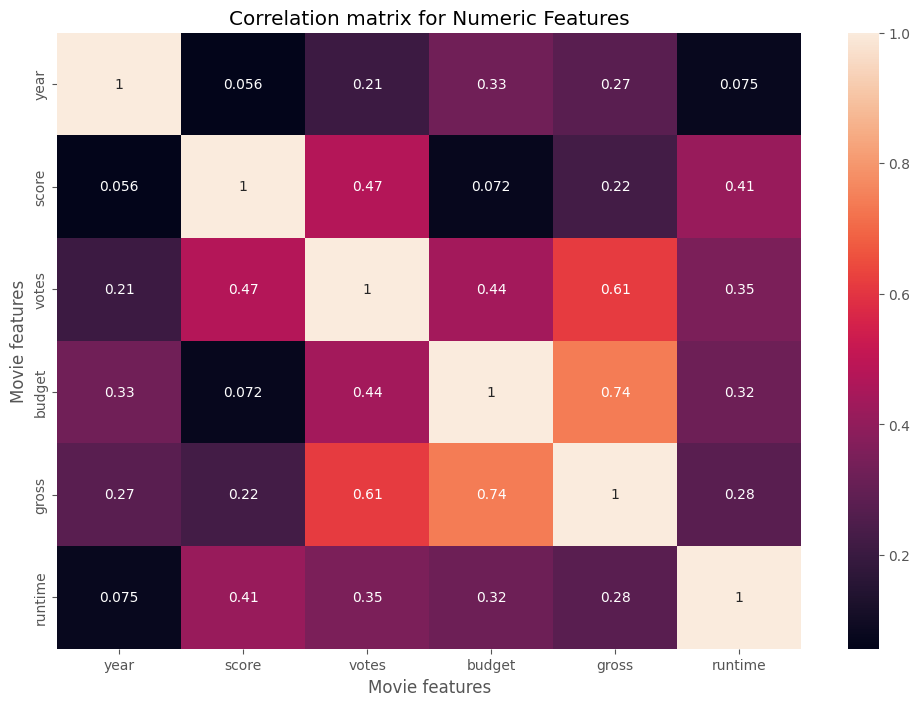

In [ ]:
#showing the heatmap of correlations
sb.heatmap(ds_corr, annot = True)

plt.title("Correlation matrix for Numeric Features")

plt.xlabel("Movie features")

plt.ylabel("Movie features")

plt.show()

In [ ]:
#creating a numerical copy of the dataset
ds_numerized=ds.copy()
for col_name in ds_numerized.columns:
  if (ds_numerized[col_name].dtype=='object'):
    ds_numerized[col_name]= ds_numerized[col_name].astype('category')
    ds_numerized[col_name]= ds_numerized[col_name].cat.codes
ds_numerized

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
5445,386,5,0,2009,527,7.8,1100000.0,785,1263,1534,47,237000000,2847246203,1382,162.0
7445,388,5,0,2019,137,8.4,903000.0,105,513,1470,47,356000000,2797501328,983,181.0
3045,4909,5,6,1997,534,7.8,1100000.0,785,1263,1073,47,200000000,2201647264,1382,194.0
6663,3643,5,0,2015,529,7.8,876000.0,768,1806,356,47,245000000,2069521700,945,138.0
7244,389,5,0,2018,145,8.4,897000.0,105,513,1470,47,321000000,2048359754,983,149.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5640,3794,6,6,2009,890,5.8,3500.0,585,2924,1498,47,3000000,5073,1385,96.0
2434,2969,5,0,1993,1467,4.5,1900.0,1805,3102,186,47,5000000,2970,1376,97.0
3681,1595,3,6,2000,1721,6.8,43000.0,952,1683,527,6,5000000,2554,466,108.0
272,2909,6,9,1982,1525,3.9,2300.0,261,55,1473,47,800000,2270,582,85.0


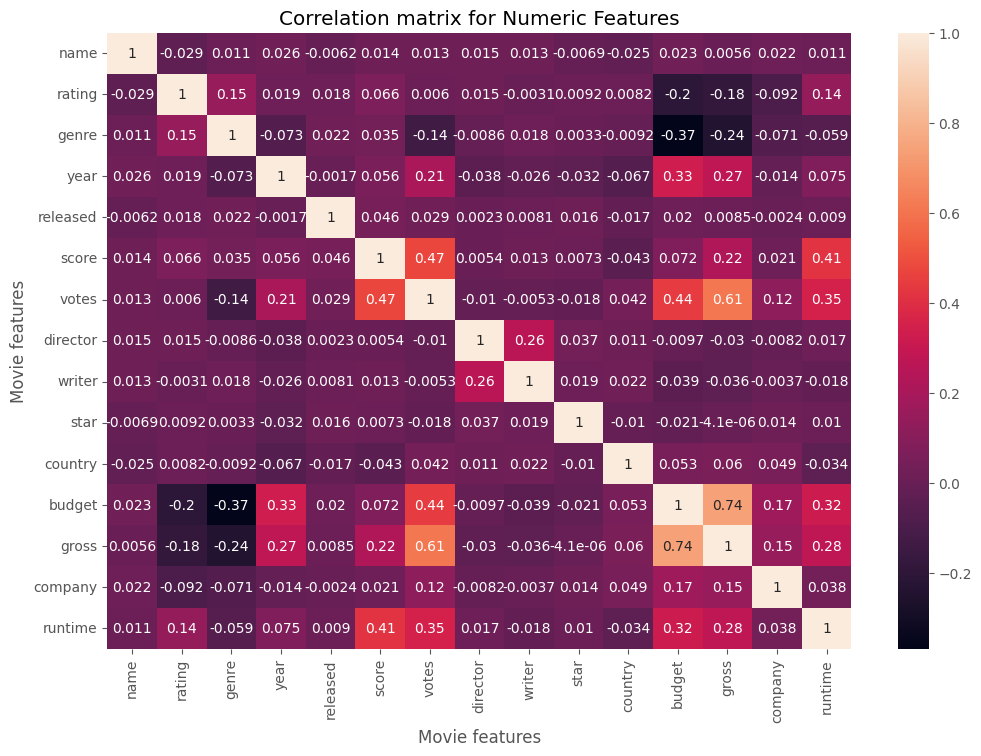

In [ ]:
#showing the heatmap of correlations of the totally numerical version
ds_corr2= ds_numerized.corr(numeric_only=True,method='pearson')
sb.heatmap(ds_corr2, annot = True)

plt.title("Correlation matrix for Numeric Features")

plt.xlabel("Movie features")

plt.ylabel("Movie features")

plt.show()

2. Testing the relation between budget and gross revenue
---

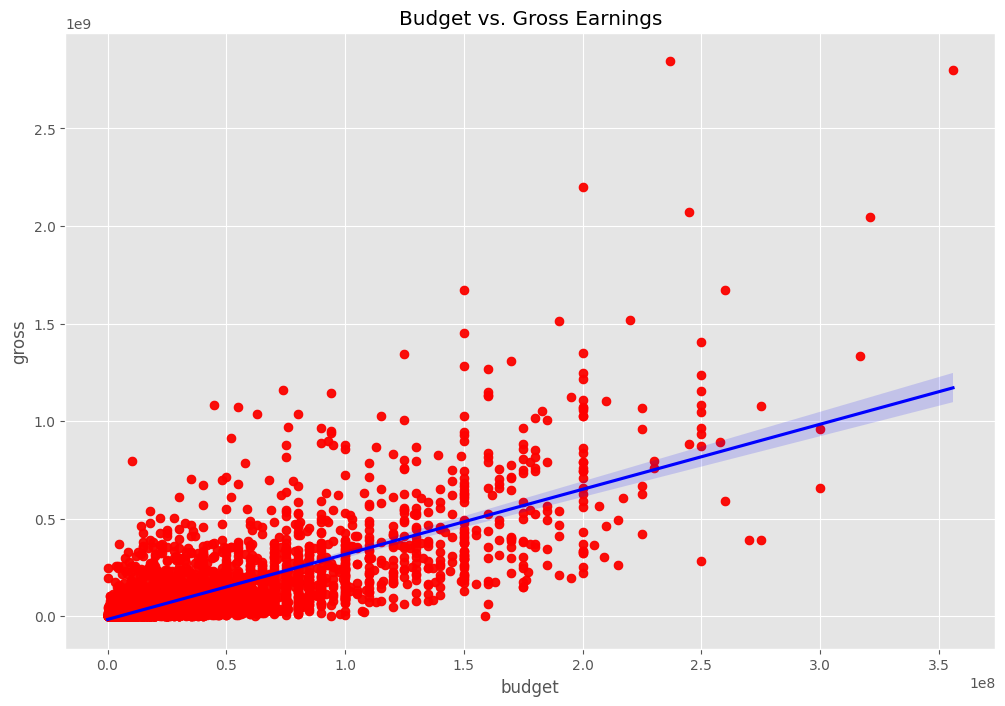

In [ ]:
#finding the effect of budget on the success of the movies
plt.scatter(x=ds['budget'],y=ds['gross'])
plt.title('Budget vs. Gross Earnings')
plt.xlabel("Gross Earnings")
plt.ylabel("Budget of film")
#finding the correlation using seaborn
sb.regplot(x='budget',y='gross',data=ds,scatter_kws={"color":"red"},line_kws={"color":"Blue"})
plt.show()

In [ ]:
#taking a snippet of the dataset
subset= ds.head(200)
subset

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6472,Godzilla,PG-13,Action,2014,"May 16, 2014 (United States)",6.4,394000.0,Gareth Edwards,Ishirô Honda,Aaron Taylor-Johnson,United States,160000000,524976069,Warner Bros.,123.0
5458,Sherlock Holmes,PG-13,Action,2009,"December 25, 2009 (United States)",7.6,596000.0,Guy Ritchie,Michael Robert Johnson,Robert Downey Jr.,United States,90000000,524028679,Warner Bros.,128.0
4500,Meet the Fockers,PG-13,Comedy,2004,"December 22, 2004 (United States)",6.3,257000.0,Jay Roach,Greg Glienna,Ben Stiller,United States,80000000,522657936,Universal Pictures,115.0
5260,WALL·E,G,Animation,2008,"June 27, 2008 (United States)",8.4,1000000.0,Andrew Stanton,Andrew Stanton,Ben Burtt,United States,180000000,521311890,FortyFour Studios,98.0


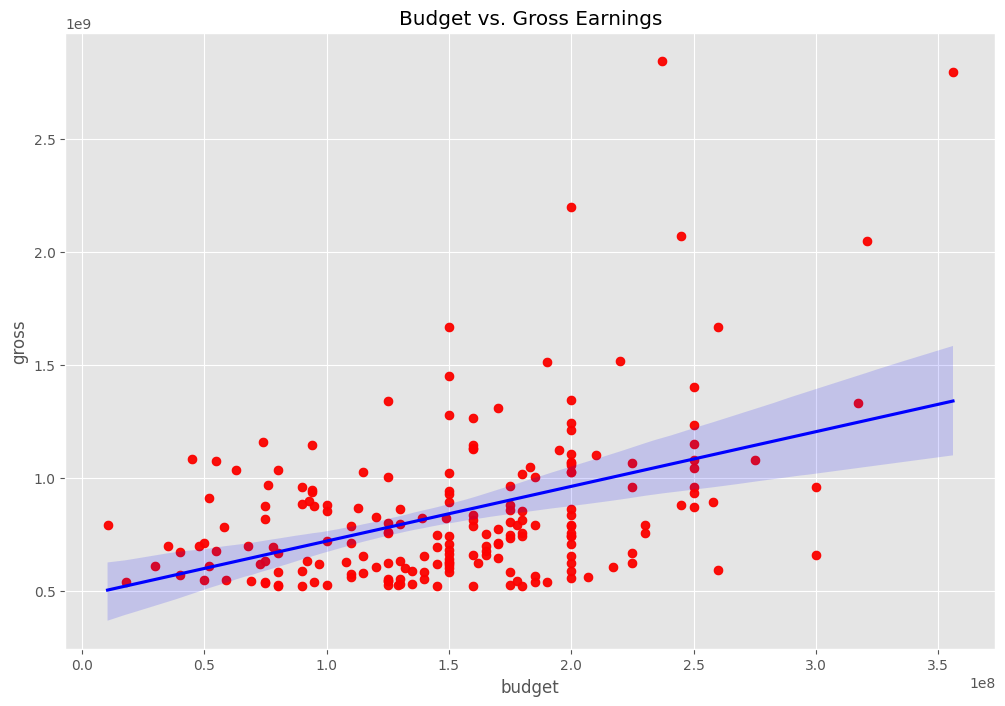

In [ ]:
#plotting the subset to see the relation clearly
plt.scatter(x=subset['budget'],y=subset['gross'])
plt.title('Budget vs. Gross Earnings')
plt.xlabel("Gross Earnings")
plt.ylabel("Budget of film")
#finding the correlation using seaborn
sb.regplot(x='budget',y='gross',data=subset,scatter_kws={"color":"red"},line_kws={"color":"Blue"})
plt.show()

In [ ]:
correlation = ds['budget'].corr(ds['gross'])
correlation

0.7402465439219625

                 There is a positive correlation between the budget spent on the film and the gross revenue.

3. Testing the relation between Directors and Average gross revenue

---



In [ ]:
unique_list_directors= pd.unique(ds['director'])
total_unique_directors = ds['director'].nunique()
print("Number of Directors is :", total_unique_directors)
print(unique_list_directors)

Number of Directors is : 2063
['James Cameron' 'Anthony Russo' 'J.J. Abrams' ... 'Stephen Cornwell'
 'John Fawcett' 'Charles Band']


In [ ]:
director_avg_gross = ds.groupby('director')['gross'].mean().reset_index()
director_avg_gross.columns = ['director', 'Average Gross Revenue']

director_avg_gross = director_avg_gross.sort_values(by='Average Gross Revenue', ascending=False)


In [ ]:
Top20_directors=director_avg_gross.head(20)

In [ ]:
min_avg_gross = director_avg_gross[director_avg_gross['Average Gross Revenue'] == director_avg_gross['Average Gross Revenue'].min()]
max_avg_gross = director_avg_gross[director_avg_gross['Average Gross Revenue'] == director_avg_gross['Average Gross Revenue'].max()]
print(min_avg_gross)
print(max_avg_gross)

         director  Average Gross Revenue
261  Charles Band                 2270.0
          director  Average Gross Revenue
105  Anthony Russo           1.368850e+09


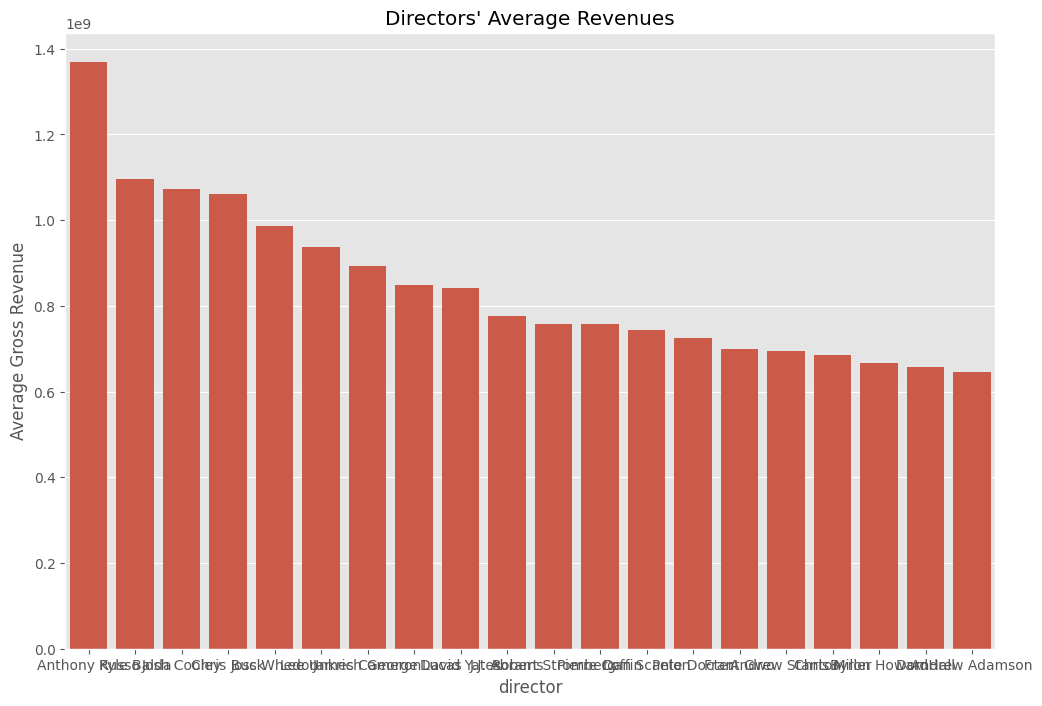

In [ ]:
#Graphing the top 20 directors to observe the differences in a small sample
sb.barplot(x=Top20_directors['director'], y= Top20_directors['Average Gross Revenue'])
plt.xlabel=("director")
plt.ylabel=("Average Gross Revenue")
plt.title("Directors' Average Revenues")
plt.show()

            Their is slight variance in the ranges of average gross revenue acheived by every director. Therefore, the name of the director does not have great effect on the gross revenue.